## Init

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

In [33]:
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.shape

(12330, 18)

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Context

The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a speciﬁc campaign, special day, user proﬁle, or period.

In [6]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [30]:
num_feats = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
             'BounceRates', 'ExitRates', 'PageValues']

In [52]:
cat_feats = ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
df[cat_feats] = df[cat_feats].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

## Null Vales
The dataset is free from NaNs.

In [10]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Invalid Values
All columns in the dataset contain valid values.

‘‘Administrative,’’ ‘‘Administrative Duration,’’ ‘‘Informational,’’ ‘‘Informational Duration,’’ ‘‘Product Related,’’ and ‘‘Product Related Duration’’ represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g., moving from one page to another.

In [11]:
df[['Administrative', 'Informational', 'ProductRelated']].describe()

# Unit = Number of pages

,Administrative,Informational,ProductRelated
count,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468
std,3.321784,1.270156,44.475503
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000
50%,1.000000,0.000000,18.000000
75%,4.000000,0.000000,38.000000
max,27.000000,24.000000,705.000000


In [12]:
df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].describe()

# Unit = Seconds

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220
std,176.779107,140.749294,1913.669288
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500
50%,7.500000,0.000000,598.936905
75%,93.256250,0.000000,1464.157213
max,3398.750000,2549.375000,63973.522230


In [13]:
hours = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]/3600
hours.describe()

# Converted to hours

# 17 hours viewing product pages seems possible

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000
mean,0.022450,0.009576,0.331874
std,0.049105,0.039097,0.531575
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.051149
50%,0.002083,0.000000,0.166371
75%,0.025905,0.000000,0.406710
max,0.944097,0.708160,17.770423


The ‘‘Bounce Rate,’’ ‘‘Exit Rate,’’ and ‘‘Page Value’’ features shown in Table 1 represent the metrics measured by ‘‘Google Analytics’’ for each page in the e-commerce site. These values can be stored in the application database for all Web pages of the e-commerce site in the developed system and updated automatically at regular intervals. 
* The value of ‘‘Bounce Rate’’ feature for a Web page refers to the percentage of visitors who enter the site from that page and then leave (‘‘bounce’’) without triggering any other requests to the analytics server during that session. 
* The value of ‘‘Exit Rate’’ feature for a speciﬁc Web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
* The ‘‘Page Value’’ feature represents the average value for a Web page that a user visited before completing an e-commerce transaction. 

In [14]:
df[['BounceRates', 'ExitRates']].describe()

# Unit = Percentage in decimals, 0 - 1

,BounceRates,ExitRates
count,12330.000000,12330.000000
mean,0.022191,0.043073
std,0.048488,0.048597
min,0.000000,0.000000
25%,0.000000,0.014286
50%,0.003112,0.025156
75%,0.016813,0.050000
max,0.200000,0.200000


In [15]:
df[['PageValues']].describe()

# Unit = TRY (Turkish Lira) ?

# Max value ~ IDR 750K

,PageValues
count,12330.000000
mean,5.889258
std,18.568437
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,361.763742


The ‘‘Special Day’’ feature indicates the closeness of the site visiting time to a speciﬁc special day (e.g., Mother’s Day, Valentine’s Day) in which the sessions are more likely to be ﬁnalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

In [16]:
df[['SpecialDay']].describe()

# 0 - 1

,SpecialDay
count,12330.000000
mean,0.061427
std,0.198917
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

The 'Revenue' attribute can be used as the class label.

In [53]:
df.describe(exclude='number')

# Month only 10 out of 12?

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [54]:
for feat in cat_feats:
    print(feat, df[feat].unique())
    
# OS, browser, region, traffictype are sanitized to 1, 2, ..., n

Month ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
OperatingSystems [1 2 4 3 7 6 8 5]
Browser [1 2 3 4 5 6 7 10 8 9 12 13 11]
Region [1 9 2 3 4 5 6 7 8]
TrafficType [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20]
VisitorType ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend [False True]
Revenue [False True]


## Duplicate Values
There are 125 duplicated rows in the dataset. Considering small volume and probable values, these are kept.

In [28]:
pd.set_option('display.max_rows', 200)
print(len(df[df.duplicated(keep='first')]))
df[df.duplicated(keep='first')]

# Duplicated values as below seems probable

125


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
554,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [29]:
pd.set_option('display.max_rows', 10)

## Outliers
There are outliers in every numerical features in the dataset. Considering values are not invalid and seems natural, these are kept to build a model that is robust to outliers.

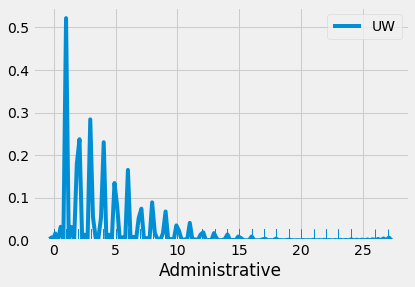

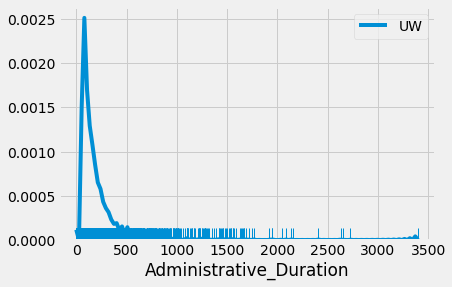

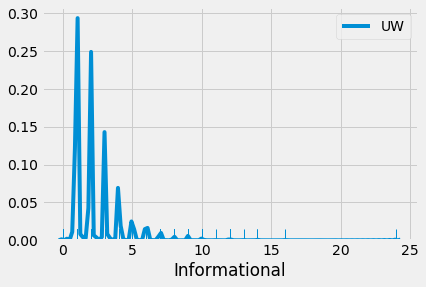

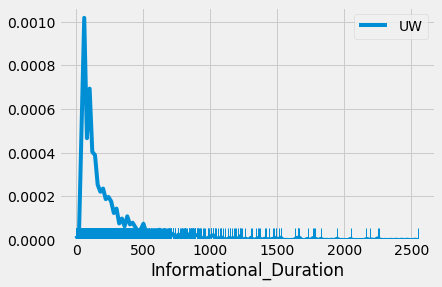

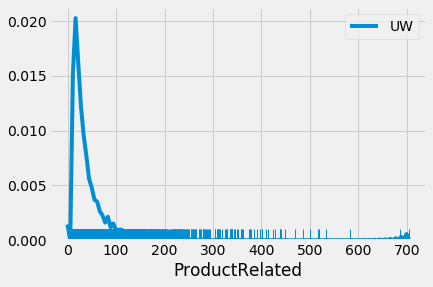

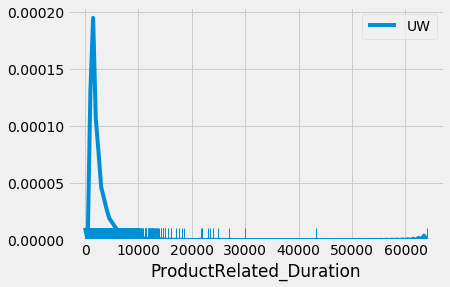

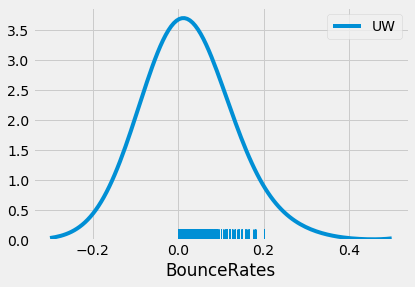

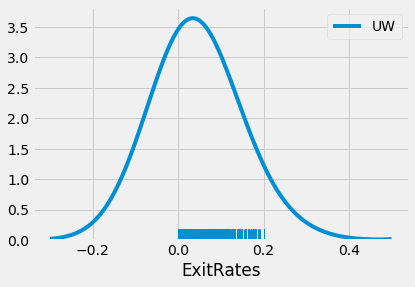

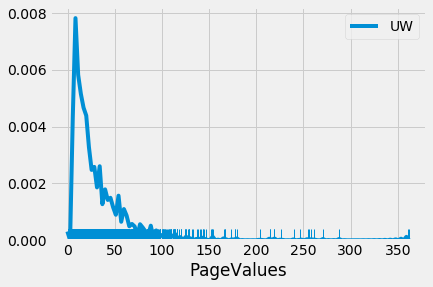

In [32]:
for column in num_feats:
    sns.distplot(df[column], rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.show()
    
# lots of features with zeros

In [38]:
def normal_shapiro(df, col, alpha):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name
       alpha = Threshold level (float)'''
    
    stat, p = shapiro(df[col])
    print(col)
    print(' Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(' Distribution looks Gaussian (fail to reject H0)')
    else:
        print(' Distribution does not look Gaussian (reject H0)')
    print('\n')
    
for feat in num_feats:
    normal_shapiro(df, feat, 0.05)

Administrative
 Statistics=0.734, p=0.000
 Distribution does not look Gaussian (reject H0)


Administrative_Duration
 Statistics=0.482, p=0.000
 Distribution does not look Gaussian (reject H0)


Informational
 Statistics=0.458, p=0.000
 Distribution does not look Gaussian (reject H0)


Informational_Duration
 Statistics=0.260, p=0.000
 Distribution does not look Gaussian (reject H0)


ProductRelated
 Statistics=0.610, p=0.000
 Distribution does not look Gaussian (reject H0)


ProductRelated_Duration
 Statistics=0.555, p=0.000
 Distribution does not look Gaussian (reject H0)


BounceRates
 Statistics=0.492, p=0.000
 Distribution does not look Gaussian (reject H0)


ExitRates
 Statistics=0.699, p=0.000
 Distribution does not look Gaussian (reject H0)


PageValues
 Statistics=0.355, p=0.000
 Distribution does not look Gaussian (reject H0)




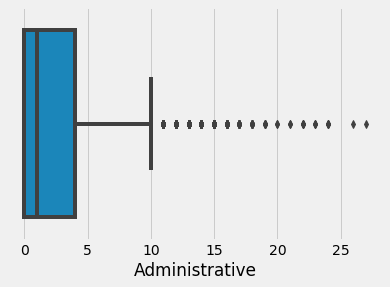

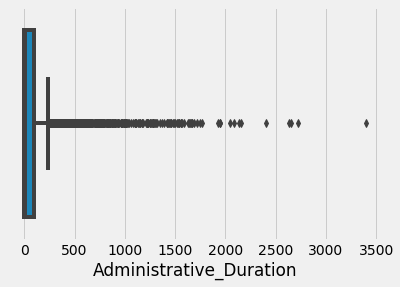

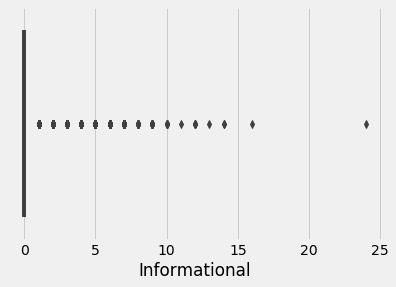

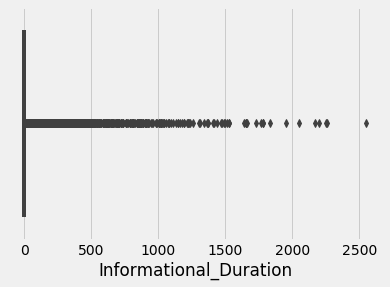

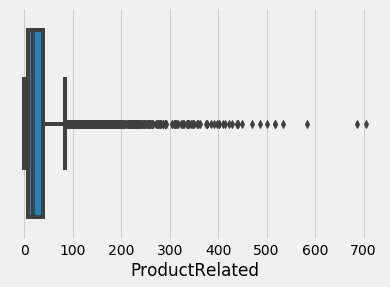

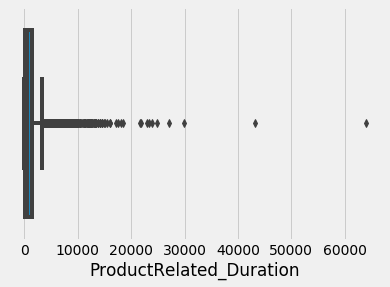

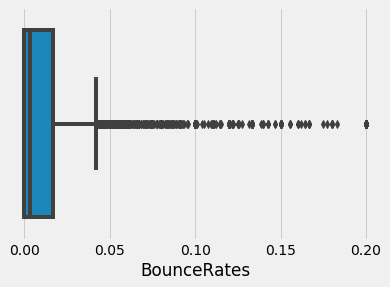

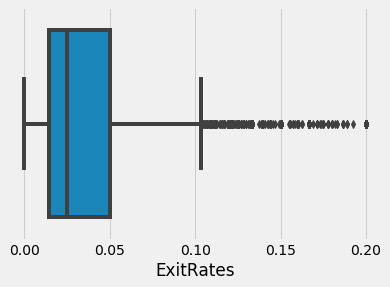

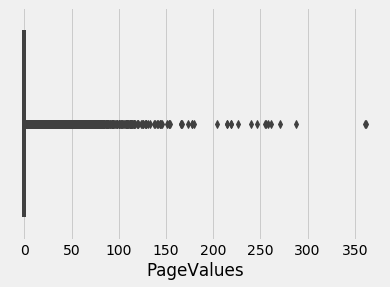

In [31]:
for feat in num_feats:
    sns.boxplot(df[feat])
    plt.show()
    
# visually spotted outliers

In [39]:
def out_iqr(df, col):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name'''
    
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    n_out = df[(df[col]<=lower)|(df[col]>=upper)].shape[0]
    n_pct = round(n_out/len(df[col])*100, 2)
    
    return 'Identified outlier in {}: \n {} records, \n {} percent, \n lower threshold: {} \n upper threshold: {} \n'.format(
        col, n_out, n_pct, round(lower, 3), round(upper, 3))

for column in num_feats:
    print(out_iqr(df, column))
    
# statistically large number of outliers are identified as below,
# for feats with many zeros especially, Q1=Q2=Q3 causing every record to be outlier

Identified outlier in Administrative: 
 557 records, 
 4.52 percent, 
 lower threshold: -6.0 
 upper threshold: 10.0 

Identified outlier in Administrative_Duration: 
 1172 records, 
 9.51 percent, 
 lower threshold: -139.884 
 upper threshold: 233.141 

Identified outlier in Informational: 
 12330 records, 
 100.0 percent, 
 lower threshold: 0.0 
 upper threshold: 0.0 

Identified outlier in Informational_Duration: 
 12330 records, 
 100.0 percent, 
 lower threshold: 0.0 
 upper threshold: 0.0 

Identified outlier in ProductRelated: 
 987 records, 
 8.0 percent, 
 lower threshold: -39.5 
 upper threshold: 84.5 

Identified outlier in ProductRelated_Duration: 
 961 records, 
 7.79 percent, 
 lower threshold: -1735.892 
 upper threshold: 3384.187 

Identified outlier in BounceRates: 
 1551 records, 
 12.58 percent, 
 lower threshold: -0.025 
 upper threshold: 0.042 

Identified outlier in ExitRates: 
 1099 records, 
 8.91 percent, 
 lower threshold: -0.039 
 upper threshold: 0.104 

Ide

## Others
Weird rows that should be inquired to the data engineer or DB admin(?). Considering small volume these are kept, for now.

In [43]:
df[(df['Administrative'] == 0) & (df['Informational'] == 0) & (df['ProductRelated'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2683,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,May,3,2,3,18,Returning_Visitor,True,False
3187,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,May,2,2,8,3,Returning_Visitor,False,False
5557,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,9,3,Returning_Visitor,False,False
5800,0,0.0,0,0.0,0,0.0,0.18,0.181818,0.0,0.0,June,2,2,7,6,Returning_Visitor,False,False
8052,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,9,2,Returning_Visitor,False,False
11865,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,8,8,Returning_Visitor,False,False


In [44]:
df[(df['Administrative_Duration'] == 0) & (df['Informational_Duration'] == 0) & (df['ProductRelated_Duration'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
16,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,0,0.0,0,0.0,3,0.0,0.2,0.2,0.0,0.0,Nov,3,2,1,10,Returning_Visitor,False,False
12200,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,6,1,Returning_Visitor,True,False
12220,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Nov,2,5,1,2,Returning_Visitor,False,False
12301,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False,False


In [45]:
df[(df['Administrative'] == 0) & (df['Informational'] == 0) & (df['ProductRelated'] == 0) &
   (df['Administrative_Duration'] == 0) & (df['Informational_Duration'] == 0) & (df['ProductRelated_Duration'] == 0)
  ]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2683,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,May,3,2,3,18,Returning_Visitor,True,False
3187,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,May,2,2,8,3,Returning_Visitor,False,False
5557,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,9,3,Returning_Visitor,False,False
5800,0,0.0,0,0.0,0,0.0,0.18,0.181818,0.0,0.0,June,2,2,7,6,Returning_Visitor,False,False
8052,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,9,2,Returning_Visitor,False,False
11865,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,8,8,Returning_Visitor,False,False


In [46]:
df[(df['BounceRates'] == 0) & (df['ExitRates'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5457,1,63.4,0,0.0,3,120.400000,0.0,0.0,42.293068,0.0,Oct,1,1,3,3,New_Visitor,False,True
5494,0,0.0,0,0.0,24,968.692424,0.0,0.0,106.252517,0.0,Nov,1,1,9,2,Returning_Visitor,False,True
5505,0,0.0,0,0.0,16,519.866667,0.0,0.0,0.000000,0.0,Jul,1,1,1,4,Returning_Visitor,False,False
5533,6,85.2,0,0.0,11,203.000000,0.0,0.0,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,False
5636,0,0.0,0,0.0,13,187.000000,0.0,0.0,0.000000,0.0,Sep,2,5,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,3,94.6,0,0.0,17,265.500000,0.0,0.0,0.000000,0.0,Oct,2,2,1,2,New_Visitor,False,False
7848,1,53.4,0,0.0,3,292.000000,0.0,0.0,0.000000,0.0,Nov,2,2,1,4,Returning_Visitor,False,False
7853,1,51.4,0,0.0,7,562.300000,0.0,0.0,36.657350,0.0,Jul,1,1,6,2,New_Visitor,True,True
7923,0,0.0,0,0.0,47,636.700000,0.0,0.0,0.000000,0.0,Aug,2,4,1,2,New_Visitor,False,False


# Conclusion
There are no changes made to the dataset.